### Solve IK for `myohuman` 

In [1]:
import mujoco
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
from util import rpy2r,r2quat,get_uv_dict_em,get_p_target_em, rpy2R
np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.7]


In [2]:
xml_path = '../asset/myolegs_v0.56(mj237).mjb'
env = MuJoCoParserClass(name='myosuite',rel_xml_path=xml_path,VERBOSE=True)
# Modify the color of body exluding 'world'
for body_name in env.body_names:
    if body_name in ['world']: continue
    body_idx = env.body_names.index(body_name)
    geom_idxs = [idx for idx,val in enumerate(env.model.geom_bodyid) if val==body_idx]
    for geom_idx in geom_idxs:
        env.model.geom(geom_idx).rgba = [0.3,0.3,0.5,0.5]
print ("Done.")

dt:[0.0010] HZ:[1000]
n_dof (=nv):[34]
n_geom:[93]
geom_names:['floor', None, None, 'terrain', 'torso', None, None, None, None, 'humerus_r', 'ulna_rv', 'humerus_l', 'ulna_lv', 'hat_spine_coll', 'hat_jaw_coll2', 'hat_skull_coll', 'r_pelvis_col', 'l_pelvis_col', 'r_pelvis', 'l_pelvis', 'sacrum', 'Gmax1_at_pelvis_r_wrap', 'Gmax2_at_pelvis_r_wrap', 'Gmax3_at_pelvis_r_wrap', 'Gmax1_at_pelvis_l_wrap', 'Gmax2_at_pelvis_l_wrap', 'Gmax3_at_pelvis_l_wrap', 'PS_at_brim_r_wrap', 'PS_at_brim_l_wrap', 'IL_at_brim_r_wrap', 'IL_at_brim_l_wrap', 'r_femur1_col', 'r_femur2_col', 'r_femur', 'Gastroc_at_condyles_r_wrap', 'KnExt_at_fem_r_wrap', 'AB_at_femshaft_r_wrap', 'AL_at_femshaft_r_wrap', 'AMprox_at_femshaft_r_wrap', 'AMmid_at_femshaft_r_wrap', 'AMdist_at_femshaft_r_wrap', 'AMisch_at_condyles_r_wrap', 'PECT_at_femshaft_r_wrap', 'r_tibia1_col', 'r_tibia2_col', 'r_tibia', 'r_fibula', 'GasLat_at_shank_r_wrap', 'GasMed_at_shank_r_wrap', 'GR_at_condyles_r_wrap', 'SM_at_condyles_r_wrap', 'ST_at_condyles_r_wr

In [9]:
# Initialize MuJoCo viewer
env.init_viewer(viewer_title='Common Rig H EmotionMocap',viewer_width=1200,viewer_height=800,
                viewer_hide_menus=True)
env.update_viewer(azimuth=152,distance=3.0,elevation=-30,lookat=[0.02,-0.03,0.8])

while env.is_viewer_alive():
    # Plot world frame
    env.plot_T(p=np.zeros(3),R=np.eye(3,3),
                PLOT_AXIS=True,axis_len=0.5,axis_width=0.005)
    
    # Text information
    env.plot_T(p=np.array([0,0,0.5]),R=np.eye(3),PLOT_AXIS=False,
                label='Tick:[%d]'%(env.tick))

    env.plot_body_T(body_name='root',PLOT_AXIS=True,axis_len=0.5,axis_width=0.01)
    for body_name in env.body_names:
        p,R = env.get_pR_body(body_name=body_name)
        env.plot_T(p=p,R=R,PLOT_AXIS=False,axis_len=0.05,axis_width=0.005)

    env.render()

# Close MuJoCo viewer
env.close_viewer()

Pressed ESC
Quitting.


In [5]:
idxs = [3, 4, 5, 9, 10, 11, 15, 16, 18, 19, 46, 48, 49]
parent_idxs = [2, 3, 4, 2, 9, 10, 2, 15, 16, 18, 15, 46, 48]
for idx, parent_idx in zip(idxs, parent_idxs):
    # parent_idx=env.model.body(idx).parentid
    print("idx {}".format(idx), env.model.body(idx).name)
    print("parent {}".format(parent_idx), env.model.body(parent_idx).name)
    _parent_idxs = env.model.body(idx).parentid
    print("_parent_idxs", _parent_idxs)
    for _parent_idx in _parent_idxs:
        if parent_idx == _parent_idx:
            print("Correct")
        else:
            print("Wrong")
    # print("ulna pos", env.model.body(idx).pos)
    np.linalg.norm(env.model.body(idx).pos)
    # a = np.array([0.,   -0.01,  0.02])
    # b = np.array([ 0.01, -0.29, -0.01])
    # np.linalg.norm(a+b)


idx 3 femur_r
parent 2 pelvis
_parent_idxs [2]
Correct
idx 4 tibia_r
parent 3 femur_r
_parent_idxs [3]
Correct
idx 5 talus_r
parent 4 tibia_r
_parent_idxs [4]
Correct
idx 9 femur_l
parent 2 pelvis
_parent_idxs [2]
Correct
idx 10 tibia_l
parent 9 femur_l
_parent_idxs [9]
Correct
idx 11 talus_l
parent 10 tibia_l
_parent_idxs [10]
Correct
idx 15 torso
parent 2 pelvis
_parent_idxs [2]
Correct
idx 16 humerus_r
parent 15 torso
_parent_idxs [15]
Correct
idx 18 radius
parent 16 humerus_r
_parent_idxs [17]
Wrong
idx 19 lunate
parent 18 radius
_parent_idxs [18]
Correct
idx 46 humerus_l
parent 15 torso
_parent_idxs [15]
Correct
idx 48 radius_l
parent 46 humerus_l
_parent_idxs [47]
Wrong
idx 49 lunate_l
parent 48 radius_l
_parent_idxs [48]
Correct


In [6]:

body_names = ['femur_r','tibia_r','talus_r','femur_l','tibia_l','talus_l','torso',
                     'humerus_r','radius','lunate','humerus_l','radius_l','lunate_l']
parent_names = ['body_root','tibia_r','talus_r','femur_l','tibia_l','talus_l','torso',
                     'humerus_r','radius','lunate','humerus_l','radius_l','lunate_l']
idxs = env.get_idxs_body(body_names)
parenrt_idxs = env.get_idxs_body(parent_names)
for idx, parent_idx in zip(idxs, parent_idxs):
    # parent_idx=env.model.body(idx).parentid
    print("idx {}".format(idx), env.model.body(idx).name)
    print("parent {}".format(parent_idx), env.model.body(parent_idx).name)
    _parent_idxs = env.model.body(idx).parentid
    print("_parent_idxs", _parent_idxs)
    for _parent_idx in _parent_idxs:
        if parent_idx == _parent_idx:
            print("Correct")
        else:
            print("Wrong")
    # print("ulna pos", env.model.body(idx).pos)
    np.linalg.norm(env.model.body(idx).pos)
    # a = np.array([0.,   -0.01,  0.02])
    # b = np.array([ 0.01, -0.29, -0.01])
    # np.linalg.norm(a+b)


idx 3 femur_r
parent 2 pelvis
_parent_idxs [2]
Correct
idx 4 tibia_r
parent 3 femur_r
_parent_idxs [3]
Correct
idx 5 talus_r
parent 4 tibia_r
_parent_idxs [4]
Correct
idx 9 femur_l
parent 2 pelvis
_parent_idxs [2]
Correct
idx 10 tibia_l
parent 9 femur_l
_parent_idxs [9]
Correct
idx 11 talus_l
parent 10 tibia_l
_parent_idxs [10]
Correct
idx 15 torso
parent 2 pelvis
_parent_idxs [2]
Correct
idx 16 humerus_r
parent 15 torso
_parent_idxs [15]
Correct
idx 18 radius
parent 16 humerus_r
_parent_idxs [17]
Wrong
idx 19 lunate
parent 18 radius
_parent_idxs [18]
Correct
idx 46 humerus_l
parent 15 torso
_parent_idxs [15]
Correct
idx 48 radius_l
parent 46 humerus_l
_parent_idxs [47]
Wrong
idx 49 lunate_l
parent 48 radius_l
_parent_idxs [48]
Correct


In [9]:
idx = 2

parent_idx=env.model.body(idx).parentid
print("idx {}".format(idx), env.model.body(idx).name)
print("parent {}".format(parent_idx[0]), env.model.body(parent_idx).name)
# print("ulna pos", env.model.body(idx).pos)
np.linalg.norm(env.model.body(idx).pos)
# a = np.array([0.,   -0.01,  0.02])
# b = np.array([ 0.01, -0.29, -0.01])
# np.linalg.norm(a+b)


idx 2 pelvis
parent 1 body_root


0.0

# Chain

In [ ]:
import networkx as nx
from networkx.algorithms.traversal.depth_first_search import dfs_edges

chain = nx.DiGraph(name="myosuite")
idx = 0
chain.add_node(idx)
chain.update(nodes=[(idx, env.model.body(idx))])

idx = 1
chain.add_node(idx)
chain.update(nodes=[(idx, env.model.body(idx))])

chain.nodes[1]['parent'] = 0
chain.add_edge(u_of_edge=0, v_of_edge=1)

idx = 2
chain.add_node(idx)
chain.update(nodes=[(idx, env.model.body(idx))])

chain.nodes[2]['parent'] = 1
chain.add_edge(u_of_edge=1, v_of_edge=2)
# for edge in dfs_edges(env.model.body, source=0):

#     print(edge)
    

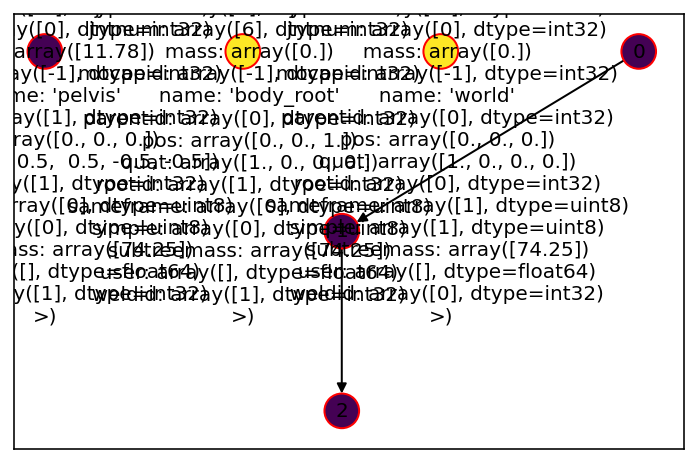

In [46]:
for layer, nodes in enumerate(nx.topological_generations(chain)):
            for node in nodes:
                chain.nodes[node]['layer'] = layer
pos = nx.multipartite_layout(chain,align="horizontal",
                                scale=1.0,subset_key='layer')
# Invert the tree so that the root node comes on the top
ROOT_ON_TOP = True
if ROOT_ON_TOP:
    pos = {node: (x, -y) for node, (x, y) in pos.items()} 
# Plot
fig,ax = plt.subplots(figsize=(6,4))
node_colors = None
if node_colors is None:
    node_colors = []
    for j_idx in range(3):
        node_color = [0,0,0,0.5]
        node_color[0] = 1
        node_color = tuple(node_color)
        node_colors.append(node_color)
nx.draw_networkx(chain,pos=pos,ax=ax,with_labels=True,
                    node_size=300,font_size=10,
                    # node_color=[[0, 1, 0],[1, 0, 0]],
                    linewidths=1,edgecolors='r')

In [39]:
node_colors

[(1, 0, 0, 0.5), (1, 0, 0, 0.5), (1, 0, 0, 0.5)]